In [33]:
import os
import json
import csv
from datetime import datetime


def extract_f1_scores(dashboard_dir, output_csv):
    """
    Traverse the dashboard directory, extract macro avg F1 scores from JSON files,
    and save to a CSV file along with relevant metadata.

    Parameters:
        dashboard_dir (str): Base directory containing the structured dashboard outputs.
        output_csv (str): Path to save the resulting CSV file.
    """
    # Ensure the output directory exists
    os.makedirs(os.path.dirname(output_csv), exist_ok=True)

    # Open the CSV file for writing
    with open(output_csv, mode="w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write CSV header
        csv_writer.writerow(
            [
                "timestamp",
                "model_name",
                "layer",
                "width",
                "type",
                "dataset_name",
                "dataset_split",
                "linear_macro_f1_score",
                "linear_accuracy",
                "linear_mean_cv_accuracy",
                "linear_std_cv_accuracy",
                "decision_tree_macro_f1_score",
                "decision_tree_accuracy",
                "decision_tree_mean_cv_accuracy",
                "decision_tree_std_cv_accuracy",
            ]
        )

        # Traverse the dashboard directory
        for root, _, files in os.walk(dashboard_dir):
            for file in files:
                if file.endswith(".json"):
                    json_path = os.path.join(root, file)

                    try:
                        # Load the JSON file
                        with open(json_path, "r") as f:
                            data = json.load(f)

                        # Extract metadata
                        metadata = data.get("metadata", {})
                        models = data.get("models", {})

                        timestamp = metadata.get("timestamp", "N/A")
                        model_name = metadata.get("model", {}).get("name", "N/A")
                        layer = metadata.get("model", {}).get("layer", "N/A")
                        width = metadata.get("args", {}).get("width", "N/A")
                        dataset_name = metadata.get("dataset", {}).get("name", "N/A")
                        dataset_split = metadata.get("args", {}).get(
                            "dataset_split", "N/A"
                        )
                        hidden = metadata.get("dataset", {}).get("hidden", "N/A")

                        if hidden:
                            hidden_value = "Hidden States"
                        else:
                            hidden_value = "SAE Features"

                        # Extract Linear Probe metrics
                        linear_probe = models.get("linearProbe", {})
                        linear_macro_avg = linear_probe.get(
                            "aggregated_metrics", {}
                        ).get("macro avg", {})
                        linear_f1_score = linear_macro_avg.get("f1_score", "N/A")

                        linear_performance = linear_probe.get("performance", {})
                        linear_accuracy = linear_performance.get("accuracy", "N/A")
                        linear_cv = linear_performance.get("cross_validation", {})
                        linear_mean_cv_accuracy = linear_cv.get("mean_accuracy", "N/A")
                        linear_std_cv_accuracy = linear_cv.get("std_accuracy", "N/A")

                        # Extract Decision Tree metrics
                        decision_tree = models.get("decisionTree", {})
                        decision_tree_macro_avg = decision_tree.get(
                            "aggregated_metrics", {}
                        ).get("macro avg", {})
                        decision_tree_f1_score = decision_tree_macro_avg.get(
                            "f1_score", "N/A"
                        )

                        decision_tree_performance = decision_tree.get("performance", {})
                        decision_tree_accuracy = decision_tree_performance.get(
                            "accuracy", "N/A"
                        )
                        decision_tree_cv = decision_tree_performance.get(
                            "cross_validation", {}
                        )
                        decision_tree_mean_cv_accuracy = decision_tree_cv.get(
                            "mean_accuracy", "N/A"
                        )
                        decision_tree_std_cv_accuracy = decision_tree_cv.get(
                            "std_accuracy", "N/A"
                        )

                        # Append extracted data to CSV
                        csv_writer.writerow(
                            [
                                timestamp,
                                model_name,
                                layer,
                                width,
                                hidden_value,
                                dataset_name,
                                dataset_split,
                                linear_f1_score,
                                linear_accuracy,
                                linear_mean_cv_accuracy,
                                linear_std_cv_accuracy,
                                decision_tree_f1_score,
                                decision_tree_accuracy,
                                decision_tree_mean_cv_accuracy,
                                decision_tree_std_cv_accuracy,
                            ]
                        )

                        print(f"Processed: {json_path}")

                    except Exception as e:
                        print(f"Error processing {json_path}: {e}")

    print(f"Extraction complete. Results saved to {output_csv}")


# Example usage
if __name__ == "__main__":
    dashboard_dir = "../dashboard_data/"  # Replace with your dashboard directory
    output_csv = "./macro_f1_scores.csv"  # Replace with your desired CSV output file
    extract_f1_scores(dashboard_dir, output_csv)

Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/layer_17/16k/20241121_221556/hidden_classifier_results.json
Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/layer_17/16k/20241121_221556/sae_classifier_results.json
Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/layer_12/16k/20241121_221355/hidden_classifier_results.json
Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/layer_12/16k/20241121_221355/sae_classifier_results.json
Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/layer_6/16k/20241121_221307/hidden_classifier_results.json
Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/layer_6/16k/20241121_221307/sae_classifier_results.json
Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/layer_6/16k/20241118_200910/hidden_classifier_results.json
Processed: ../dashboard_data/google_gemma-2b/Anthropic_election_questions/

In [34]:
import pandas as pd

pd.read_csv(output_csv)

,timestamp,model_name,layer,width,type,dataset_name,dataset_split,linear_macro_f1_score,linear_accuracy,linear_mean_cv_accuracy,linear_std_cv_accuracy,decision_tree_macro_f1_score,decision_tree_accuracy,decision_tree_mean_cv_accuracy,decision_tree_std_cv_accuracy
0,2024-11-21T22:15:56.803580,google/gemma-2b,17,16k,Hidden States,Anthropic/election_questions,test,0.986562,0.986577,0.974719,0.014147,0.824547,0.825503,0.851873,0.022792
1,2024-11-21T22:15:56.806585,google/gemma-2b,17,16k,SAE Features,Anthropic/election_questions,test,0.800185,0.805369,0.974733,0.010675,0.825117,0.825503,0.868694,0.022252
2,2024-11-21T22:13:55.374008,google/gemma-2b,12,16k,Hidden States,Anthropic/election_questions,test,0.986562,0.986577,0.983165,0.005315,0.879189,0.879195,0.883791,0.014909
3,2024-11-21T22:13:55.377066,google/gemma-2b,12,16k,SAE Features,Anthropic/election_questions,test,0.973124,0.973154,0.968010,0.013453,0.905320,0.906040,0.934340,0.013462
4,2024-11-21T22:13:07.416577,google/gemma-2b,6,16k,Hidden States,Anthropic/election_questions,test,0.986572,0.986577,0.974761,0.009180,0.885721,0.885906,0.888905,0.013321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2024-11-21T21:05:21.836543,google/gemma-2-2b,5,65k,SAE Features,AIM-Harvard/reject_prompts,train,0.995968,0.995968,0.993960,0.008045,0.983870,0.983871,0.979849,0.006348
70,2024-11-21T20:23:20.698126,google/gemma-2-2b,19,16k,Hidden States,AIM-Harvard/reject_prompts,train,1.000000,1.000000,0.996970,0.002474,0.959675,0.959677,0.954611,0.018935
71,2024-11-21T20:23:20.701564,google/gemma-2-2b,19,16k,SAE Features,AIM-Harvard/reject_prompts,train,0.987903,0.987903,0.995975,0.003762,0.947539,0.947581,0.963728,0.009709
72,2024-11-21T21:11:58.867574,google/gemma-2-2b,19,65k,Hidden States,AIM-Harvard/reject_prompts,train,0.991935,0.991935,1.000000,0.000000,0.963709,0.963710,0.941531,0.008176


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

raw_df = pd.read_csv(output_csv)

# Group by relevant fields to compute mean scores
grouped_df = (
    raw_df.groupby(
        ["model_name", "layer", "width", "type", "dataset_name", "dataset_split"]
    )
    .agg(
        {
            "linear_macro_f1_score": "mean",
            "linear_accuracy": "mean",
            "linear_mean_cv_accuracy": "mean",
            "linear_std_cv_accuracy": "mean",
            "decision_tree_macro_f1_score": "mean",
            "decision_tree_accuracy": "mean",
            "decision_tree_mean_cv_accuracy": "mean",
            "decision_tree_std_cv_accuracy": "mean",
        }
    )
    .reset_index()
)

# Pivot the data to separate SAE Features and Hidden States
merged_df = grouped_df.pivot(
    index=["model_name", "layer", "width", "dataset_name", "dataset_split"],
    columns="type",
    values=[
        "linear_macro_f1_score",
        "linear_accuracy",
        "linear_mean_cv_accuracy",
        "linear_std_cv_accuracy",
        "decision_tree_macro_f1_score",
        "decision_tree_accuracy",
        "decision_tree_mean_cv_accuracy",
        "decision_tree_std_cv_accuracy",
    ],
)

# Flatten the MultiIndex columns
merged_df.columns = ["_".join(col).strip() for col in merged_df.columns.values]
merged_df = merged_df.reset_index()

# Preview the merged DataFrame
print(merged_df.head())

          model_name  layer width                             dataset_name  \
0  google/gemma-2-2b      5   16k               AIM-Harvard/reject_prompts   
1  google/gemma-2-2b      5   16k             Anthropic/election_questions   
2  google/gemma-2-2b      5   16k  textdetox/multilingual_toxicity_dataset   
3  google/gemma-2-2b      5   65k               AIM-Harvard/reject_prompts   
4  google/gemma-2-2b      5   65k             Anthropic/election_questions   

  dataset_split  linear_macro_f1_score_Hidden States  \
0         train                             0.983867   
1          test                             0.966346   
2            en                             0.917967   
3         train                             0.991935   
4          test                             0.959715   

   linear_macro_f1_score_SAE Features  linear_accuracy_Hidden States  \
0                            0.991935                       0.983871   
1                            0.939499             

/tmp/ipykernel_220768/2706881379.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])


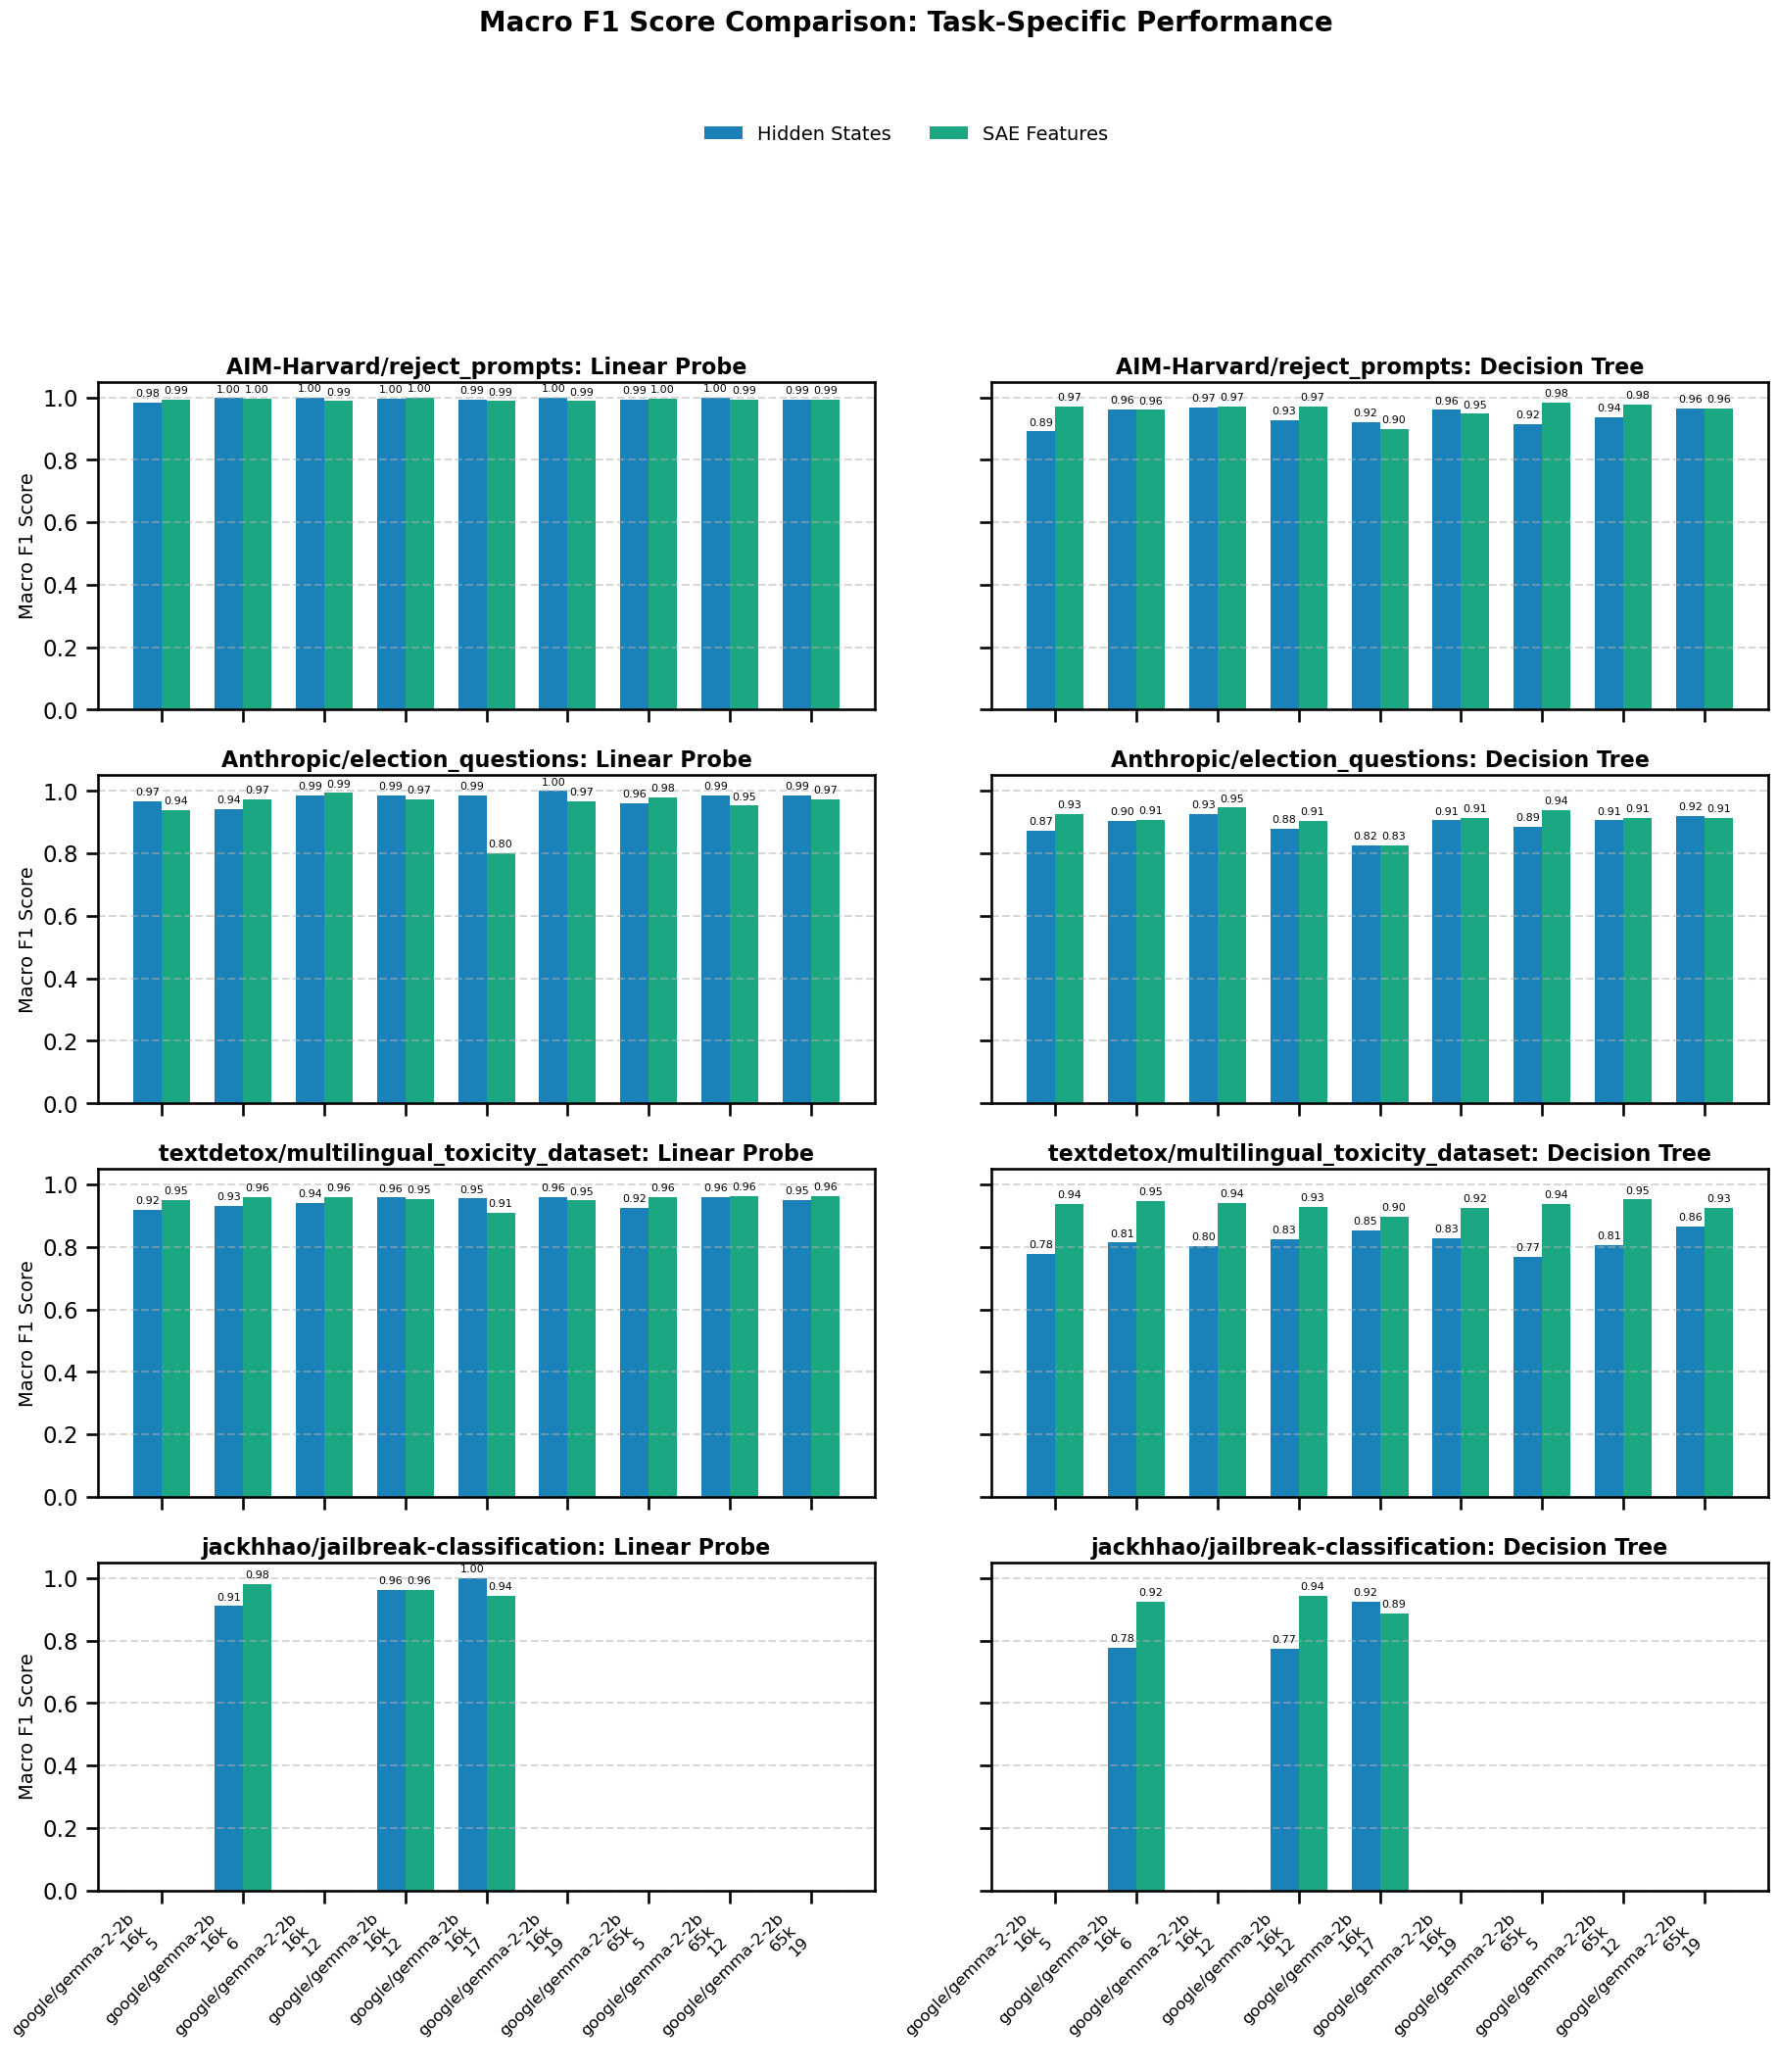

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for NeurIPS-quality
plt.style.use("seaborn-v0_8-paper")
sns.set_context("talk")  # Adjusts font sizes to be publication-quality

# Use colorblind-friendly palette
colors = sns.color_palette("colorblind")

# Sort models by size (assuming `model_name` contains size information)
merged_df["model_sort_key"] = merged_df["model_name"].apply(
    lambda x: (
        int(x.split("-")[-1].replace("b", "").replace("it", "")) if "gemma" in x else 0
    )
)
merged_df = merged_df.sort_values(by=["model_sort_key", "width", "layer"])

# Unique x-axis labels for all settings (sorted)
settings = merged_df.apply(
    lambda row: f"{row['model_name']}\n{row['width']}\n{row['layer']}",
    axis=1,
).unique()
x = np.arange(len(settings))

# Define colors for the bars
colors_hidden = colors[0]
colors_sae = colors[2]

# Group the data by tasks (e.g., datasets/models)
tasks = merged_df["dataset_name"].unique()
n_tasks = len(tasks)

# Create a figure with two subplots for each task
fig, axes = plt.subplots(
    n_tasks,
    2,
    figsize=(22, 5 * n_tasks),
    sharex=True,
    sharey=True,
    gridspec_kw={"wspace": 0.15},
)


# Function to add value labels to bars
def autolabel(ax, rects, fontsize=10):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height > 0:  # Annotate only non-zero values
            ax.annotate(
                f"{height:.2f}",
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # Vertical offset
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=fontsize,
            )


# Loop through tasks
for i, task in enumerate(tasks):
    task_df = merged_df[merged_df["dataset_name"] == task]
    task_x = [
        list(settings).index(f"{row['model_name']}\n{row['width']}\n{row['layer']}")
        for _, row in task_df.iterrows()
    ]

    # Linear Probe Performance
    ax1 = axes[i, 0]
    probe_hidden = np.zeros(len(settings))  # Default to zero for missing entries
    probe_sae = np.zeros(len(settings))
    probe_hidden[task_x] = (
        task_df["linear_macro_f1_score_Hidden States"].fillna(0).values
    )
    probe_sae[task_x] = task_df["linear_macro_f1_score_SAE Features"].fillna(0).values

    rects1 = ax1.bar(
        x - 0.35 / 2,
        probe_hidden,
        0.35,
        label="Hidden States",
        color=colors_hidden,
        alpha=0.9,
    )
    rects2 = ax1.bar(
        x + 0.35 / 2, probe_sae, 0.35, label="SAE Features", color=colors_sae, alpha=0.9
    )
    autolabel(ax1, rects1, fontsize=8)
    autolabel(ax1, rects2, fontsize=8)

    ax1.set_title(f"{task}: Linear Probe", fontsize=16, weight="bold")
    ax1.grid(axis="y", linestyle="--", alpha=0.5)
    ax1.set_ylabel("Macro F1 Score", fontsize=14)

    # Decision Tree Performance
    ax2 = axes[i, 1]
    tree_hidden = np.zeros(len(settings))
    tree_sae = np.zeros(len(settings))
    tree_hidden[task_x] = (
        task_df["decision_tree_macro_f1_score_Hidden States"].fillna(0).values
    )
    tree_sae[task_x] = (
        task_df["decision_tree_macro_f1_score_SAE Features"].fillna(0).values
    )

    rects3 = ax2.bar(
        x - 0.35 / 2,
        tree_hidden,
        0.35,
        label="Hidden States",
        color=colors_hidden,
        alpha=0.9,
    )
    rects4 = ax2.bar(
        x + 0.35 / 2, tree_sae, 0.35, label="SAE Features", color=colors_sae, alpha=0.9
    )
    autolabel(ax2, rects3, fontsize=8)
    autolabel(ax2, rects4, fontsize=8)

    ax2.set_title(f"{task}: Decision Tree", fontsize=16, weight="bold")
    ax2.grid(axis="y", linestyle="--", alpha=0.5)

# Add x-axis labels to the last row
for ax in axes[-1, :]:
    ax.set_xticks(x)
    ax.set_xticklabels(settings, rotation=45, ha="right", fontsize=12)

# Add a single legend to the figure (above the plots)
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    fontsize=14,
    frameon=False,
)

# Add overall title and adjust layout
fig.suptitle(
    "Macro F1 Score Comparison: Task-Specific Performance",
    fontsize=20,
    weight="bold",
    y=1.07,
)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig("task_f1_comparison.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()